# **Cristal Fotónico Unidimensional**

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.interpolate import interp1d


## Método de Matriz de Transferencia para Dispersión

### Definición de las variables a usar
$Q_a$, $Q_b$. Además de los índices de refracción. En este caso $Q_i$ será el producto de $q$ por el ancho de la capa correspondiente

Capa $A$

In [2]:
a = 2e-6
e_a = 13
u_a = 1

Capa $B$

In [3]:
b = 4e-6
e_b = 1
u_b = 1

freN=10e12

Ahora, definimos los índices de refracción, en este caso los representamos al cuadrado

In [4]:
n_a2 = e_a * u_a
n_b2 = e_b * u_b

Establecemos las condiciones para la capa $A$, en este caso, $Q$ está premultiplicado por $\frac{a}{2}$

In [5]:
ce = 3e8

def Q_a(v,theta):
    return (2*np.pi*v)*np.sqrt(n_a2 - np.sin(theta)**2)*a/ce

def M_a(v,theta):
    m = np.array([[np.cos(1*Q_a(v,theta)), u_a*a/( Q_a(v,theta)) * np.sin(1 * Q_a(v,theta)) ],
                  [- Q_a(v,theta)/(u_a * a) * np.sin(Q_a(v,theta)) , np.cos(1*Q_a(v,theta))]])
    return m

Ahora las condiciones para la capa $B$

In [6]:
def Q_b(v,theta):
    return (2*np.pi*v)* np.sqrt(n_b2 - np.sin(theta)**2)*b/ce

def M_b(v,theta):
    m = np.array([[np.cos(1*Q_b(v,theta)), u_b * b/ (Q_b(v,theta)) * np.sin(1 * Q_b(v,theta)) ],
                  [-Q_b(v,theta)/(u_b * b) * np.sin(Q_b(v,theta)) , np.cos(1*Q_b(v,theta))]])
    return m

Matriz de Transferencia Total

In [7]:
theta = 0
def M_t(v,theta):
    return np.dot(M_b(v,theta), M_a(v,theta))

def MAT(v,theta):
    return np.trace(M_t(v,theta))

def X(v,theta):
    if ((1/2)*MAT(v,theta)) < -1 :
        return 1
    if  ((1/2)*MAT(v,theta)) > 1 :
        return -1
    else:
        return (1/np.pi) * ((np.arccos((1/2)* MAT(v,theta)))).real

In [9]:
cte=(a+b)/ce
vs = np.arange(0.1,300,0.01)*freN
freqs = vs*cte 
values = [X(v,theta) for v in vs]
valuesNeg = [-X(v,theta) for v in vs]


Text(0.5, 1.0, 'Matriz de Transferencia: Dispersión - Band Gaps')

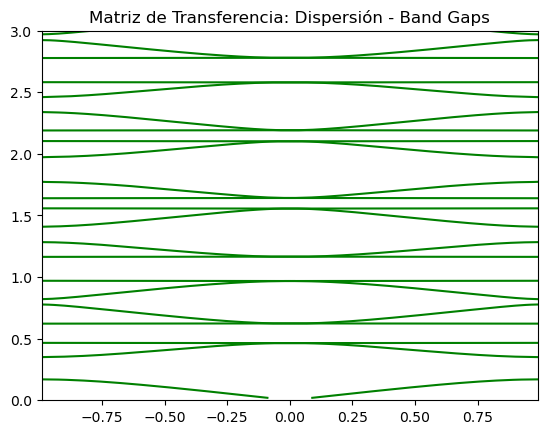

In [10]:
plt.plot(values,freqs,'-',markersize=0.85,color='green')
plt.plot(valuesNeg,freqs,'-',markersize=0.85,color='green')
plt.xlim(-0.99,0.99)
plt.ylim(0,3)
plt.title('Matriz de Transferencia: Dispersión - Band Gaps')

## Método de Matriz de Transferencia para Transmisión

Definición de las variables que vamos a utilizar. Estas son:
$Q_a$, $Q_b$, $Q_c$ y $Q_d$. En esta caso, cada $Q_i$ será el producto de $q$ por el ancho de la capa correspondiente.


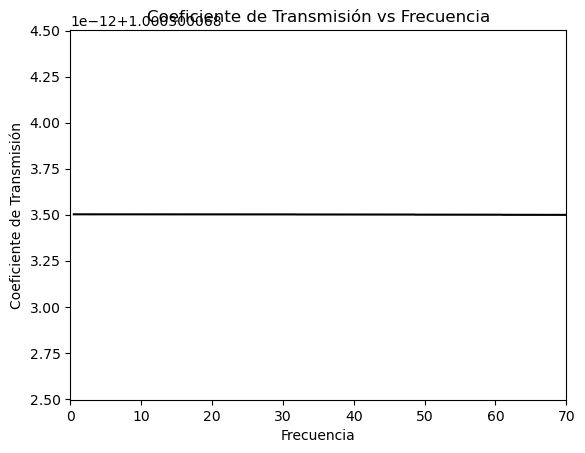

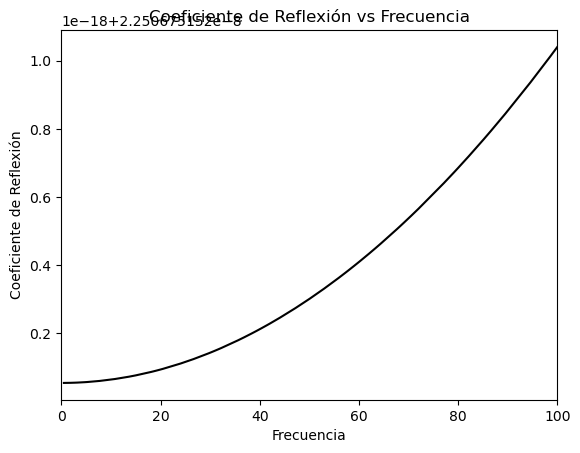

In [12]:
def xi(theta):
    return np.cos(theta)


n_a = e_a * u_a
n_b = e_b * u_b

theta = 0 * np.pi / 12
lista3 = []
lista4 = []

vs = np.arange(0.5, 100, 0.01)
for nu in vs:
    Maa = M_a(nu, theta)
    Mbb = M_b(nu, theta)
    MP = np.dot(Mbb, Maa)  
    MT = np.linalg.matrix_power(MP,50)
    
    # Cálculo del coeficiente de transmisión
    tras = np.abs((2 * xi(theta)) / (xi(theta) * (MT[0, 0] + MT[1, 1]) - MT[1, 0] - xi(theta)**2 * MT[0, 1]))**2
    refl = np.abs((xi(theta) * (-MT[1, 1] + MT[0, 0]) + MT[1, 0] - xi(theta)**2 * MT[0, 1]) /
                  (xi(theta) * (MT[1, 1] + MT[0, 0]) - MT[1, 0] - xi(theta)**2 * MT[0, 1]))**2
    
    lista3.append([nu, tras])
    lista4.append([nu, refl])

# Gráfico del coeficiente de transmisión
plt.figure()
plt.plot(*zip(*lista3), color='black', linestyle='-')
plt.xlabel('Frecuencia')
plt.ylabel('Coeficiente de Transmisión')
plt.title('Coeficiente de Transmisión vs Frecuencia')
plt.xlim([0,70])
#plt.ylim([0,8])
plt.show()

# Gráfico del coeficiente de reflexión
plt.figure()
plt.plot(*zip(*lista4), color='black', linestyle='-')
plt.xlabel('Frecuencia')
plt.ylabel('Coeficiente de Reflexión')
plt.title('Coeficiente de Reflexión vs Frecuencia')
plt.xlim([0,100])
#plt.ylim([0,150])
plt.show()


## **Densidad de Estados**

In [138]:
len(freqs)

299900

In [136]:
dato = [freqs[i] for i in range(len(freqs)) if values[i] == 1]
datos = [i for i in freqs if 0 < i < 3]

In [139]:
len(datos)

14900

(array([0.63064455, 0.31532228, 0.31532228, ..., 0.31532228, 0.31532228,
        0.63064455]),
 array([0.02      , 0.02021284, 0.02042569, ..., 2.99937431, 2.99958716,
        2.9998    ]),
 <BarContainer object of 14000 artists>)

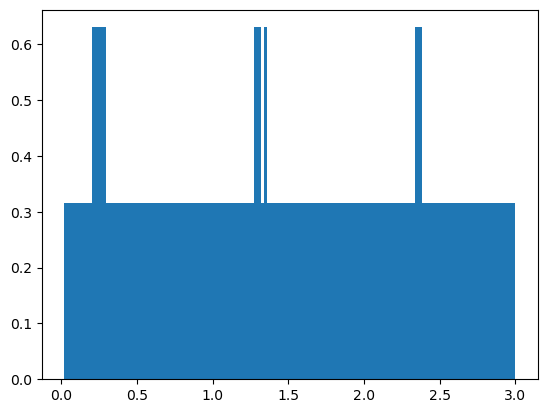

In [140]:
plt.hist(datos,bins=14000,density=True)


In [120]:
datos

[0.02,
 0.022,
 0.024,
 0.026,
 0.028,
 0.03,
 0.032,
 0.034,
 0.036,
 0.038,
 0.04,
 0.042,
 0.044,
 0.046,
 0.048,
 0.05,
 0.052,
 0.054,
 0.056,
 0.058,
 0.06,
 0.062,
 0.064,
 0.066,
 0.068,
 0.07,
 0.072,
 0.074,
 0.076,
 0.078,
 0.08,
 0.082,
 0.084,
 0.086,
 0.088,
 0.09,
 0.092,
 0.094,
 0.096,
 0.098,
 0.1,
 0.102,
 0.104,
 0.106,
 0.108,
 0.11,
 0.112,
 0.114,
 0.116,
 0.118,
 0.12,
 0.122,
 0.124,
 0.126,
 0.128,
 0.13,
 0.132,
 0.134,
 0.136,
 0.138,
 0.14,
 0.142,
 0.144,
 0.146,
 0.148,
 0.15,
 0.152,
 0.154,
 0.156,
 0.158,
 0.16,
 0.162,
 0.164,
 0.166,
 0.168,
 0.352,
 0.354,
 0.356,
 0.358,
 0.36,
 0.362,
 0.364,
 0.366,
 0.368,
 0.37,
 0.372,
 0.374,
 0.376,
 0.378,
 0.38,
 0.382,
 0.384,
 0.386,
 0.388,
 0.39,
 0.392,
 0.394,
 0.396,
 0.398,
 0.4,
 0.402,
 0.404,
 0.40599999999999997,
 0.408,
 0.41,
 0.412,
 0.414,
 0.416,
 0.418,
 0.42,
 0.422,
 0.424,
 0.426,
 0.428,
 0.43,
 0.432,
 0.434,
 0.436,
 0.438,
 0.44,
 0.442,
 0.444,
 0.446,
 0.448,
 0.45,
 0.452,
 0.45

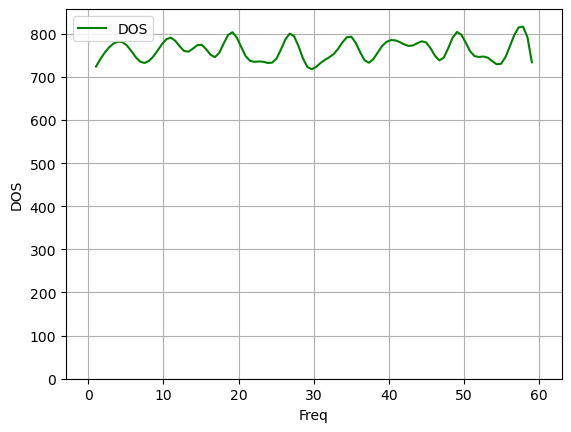

In [121]:
from scipy.interpolate import interp1d


y, bins, _ = plt.hist(datos, bins=30, alpha=0)

x = 0.5 * (bins[:-1] + bins[1:])

f = interp1d(x, y, kind='cubic')

x_interp = np.linspace(min(x), max(x), 100)

y_interp = f(x_interp)

y_i = []
for i in range(len(y_interp)):
    if y_interp[i] < 0:
        y_i.append(0)
    else:
        y_i.append(y_interp[i])

DOS_MT = [x_interp,y_i]

plt.plot(x_interp, y_i, label='DOS', color='g')
plt.xlabel('Freq')
plt.ylabel('DOS')
plt.legend()
plt.grid(True)
plt.show()